In [0]:
print("Name: Casey Weiner      Github ID: caseypw")

Name: Casey Weiner      Email: cweiner6@jhu.edu      Github ID: caseypw


In [0]:
#Necessary Package Imports
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.linear_model as lm
import sklearn as skl
import statsmodels.formula.api as smf
import statsmodels as sm
import random
from scipy import stats
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression
import csv
random.seed(10)

#Importing the Data
! if [ ! -e candy-data.csv ]; then wget https://raw.githubusercontent.com/caseypw/BiomedicalDataScience/master/candy-data.csv; fi;
data = pd.read_csv("candy-data.csv")

#Print Data
data

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
0,100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725
1,3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936
2,One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086
3,One quarter,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505
4,Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465
5,Almond Joy,1,0,0,1,0,0,0,1,0,0.465,0.767,50.347546
6,Baby Ruth,1,0,1,1,1,0,0,1,0,0.604,0.767,56.914547
7,Boston Baked Beans,0,0,0,1,0,0,0,0,1,0.313,0.511,23.417824
8,Candy Corn,0,0,0,0,0,0,0,0,1,0.906,0.325,38.010963
9,Caramel Apple Pops,0,1,1,0,0,0,0,0,0,0.604,0.325,34.517681


In [0]:
#Sort data by ascending win percentage
data_sorted = data.sort_values(by='winpercent')

#Create Random Sample of Data Points
trainFraction = 0.75
array = np.zeros(85, dtype=bool) #Array of logical indices, all set to False
length_of = int(trainFraction * len(data)) #Number of indices to be selected
used = [] #Vector of indices already changed
count = 0 #Count keeps track of how many random indices have been set to true.
while count < length_of: 
  boolean = True
  #While loop is used so that random indices can continually be picked and tested.
  while boolean:
    index = np.random.randint(len(data)) #Finds a random index between 0 and 85 inclusive.
    if index not in used: #If the index has not been used before then assign True to that index.
      array[index] = True
      used.append(index) #Add the index to used list so that it cannot be written over again and double counted.
      boolean = False
      
  count += 1

In [0]:
#Create Data Vectors
x = data_sorted[['winpercent']]
y = data_sorted[['chocolate']]

#Plugging in conditionals to numpy array
x_train = x[array] #Training data for win percentage
y_train = y[array] #Training data for chocolate conditional
x_test = x[~array] #Testing data for win percentage
y_test = y[~array] #Testing data for chocolate conditional

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Text(0, 0.5, 'Probability (unitless)')

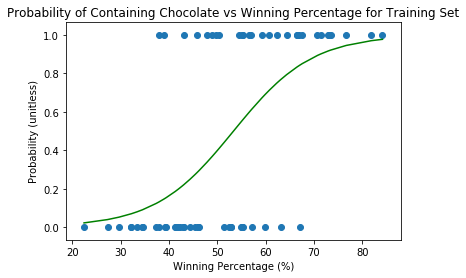

In [0]:
#Logistic Regression for training set
logreg = LogisticRegression(C=1.0, fit_intercept=True, solver='lbfgs')
fit = logreg.fit(x_train, y_train)

#Predictor Coefficients
beta1 = fit.intercept_[0]
beta2 = fit.coef_[0]

#Creating Sigmoid
y2 = (beta2 * x_train) + beta1
p_train = 1 / (1 + np.exp(-y2))
rewrite_0 = 1 / (1 + np.exp(-y2))

#Create Scatterplot of training data and sigmoid
plt.figure()
plt.plot(x_train,p_train,"g")
plt.scatter(x_train,y_train)
plt.title("Probability of Containing Chocolate vs Winning Percentage for Training Set")
plt.xlabel("Winning Percentage (%)")
plt.ylabel("Probability (unitless)")

Accuracy of Training =
0.8636363636363636
Sensitivity of Training =
0.0
Specificity of Training =
1.0
The mean square error for the training set is
0.17033061546552544
Accuracy of Testing =
0.9090909090909091
Sensitivity of Testing =
0.75
Specificity of Testing =
1.0
The mean square error for the test set is
0.09090909090909091


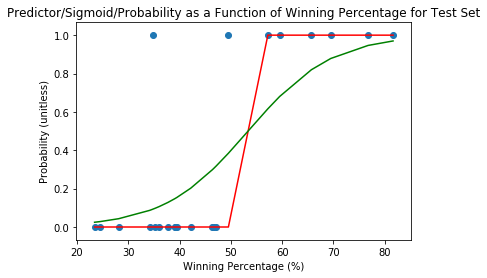

In [0]:
#Creating Sigmoid for test set
y_predict = (beta2 * x_test) + beta1
p_test = 1 / (1 + np.exp(-y_predict))
rewrite = 1 / (1 + np.exp(-y_predict))

#Thresholding the Train and Test Sigmoids to judge accuracy
rewrite_0 = rewrite_0.values
rewrite = rewrite.values #Make p into numpy to allow for indexing
for i in range(22):
  if float(x_test.values[i][0]) < 50: #Choose x value of 50 to split data into 0 on left and 1 on right: makes sigmoid into step function
    rewrite[i][0] = 0
  else:
    rewrite[i][0] = 1
  if float(x_train.values[i][0]) < 50: #Choose x value of 50 to split data into 0 on left and 1 on right: makes sigmoid into step function
    rewrite_0[i][0] = 0
  else:
    rewrite_0[i][0] = 1

plt.plot(x_test,rewrite,"r")
plt.plot(x_test,p_test,"g")
plt.scatter(x_test,y_test)
plt.title("Predictor/Sigmoid/Probability as a Function of Winning Percentage for Test Set")
plt.xlabel("Winning Percentage (%)")
plt.ylabel("Probability (unitless)")

y_compare_0 = y_train.values
y_compare = y_test.values

TP_0 = 0
FN_0 = 0
FP_0 = 0
TN_0 = 0
#Use accuracy, sensitivity, specificity to measure performance on training set
for i in range(len(x_train)):
    
    if rewrite_0[i][0] == 1 and y_compare_0[i][0] == 1:
      TP_0 += 1
    if rewrite_0[i][0] == 0 and y_compare_0[i][0] == 1:
      FN_0 += 1
    if rewrite_0[i][0] == 1 and y_compare_0[i][0] == 0:
      FP_0 += 1
    if rewrite_0[i][0] == 0 and y_compare_0[i][0] == 0:
      TN_0 += 1
      
sensitivity_0 = (TP_0 / (TP_0 + FN_0))
specificity_0 = (TN_0 / (TN_0 + FP_0))
accuracy_0 = (TP_0 + TN_0) / (TN_0 + TP_0 + FP_0 + FN_0)

print("Accuracy of Training =")
print(accuracy_0)

print("Sensitivity of Training =")
print(sensitivity_0)

print("Specificity of Training =")
print(specificity_0)

#The MSE is used to quantify accuracy for training
Error_MSE_0 = mean_squared_error(y_train,rewrite_0)
print("The mean square error for the training set is")
print(Error_MSE_0)

TP = 0
FN = 0
FP = 0
TN = 0
#Use accuracy, sensitivity, specificity to measure performance on test set
for i in range(len(rewrite)):
    
    if rewrite[i][0] == 1 and y_compare[i][0] == 1:
      TP += 1
    if rewrite[i][0] == 0 and y_compare[i][0] == 1:
      FN += 1
    if rewrite[i][0] == 1 and y_compare[i][0] == 0:
      FP += 1
    if rewrite[i][0] == 0 and y_compare[i][0] == 0:
      TN += 1
      
sensitivity = (TP / (TP + FN))
specificity = (TN / (TN + FP))
accuracy = (TP + TN) / (TN + TP + FP + FN)

print("Accuracy of Testing =")
print(accuracy)

print("Sensitivity of Testing =")
print(sensitivity)

print("Specificity of Testing =")
print(specificity)

#The MSE is also used to quantify accuracy for testing
Error_MSE = mean_squared_error(y_test,rewrite)
print("The mean square error for the test set is")
print(Error_MSE)